# Credit Card Customer Segmentation

In [65]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [39]:
import pandas as pd
data=pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Clustering Preprocessing

In [40]:
data.shape

(8950, 18)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [42]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [43]:
data.isnull().sum().sum()

314

In [44]:
#Replacing missing numerical values with median
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()

In [45]:
# drop ID column
data = data.drop('CUST_ID', 1)


In [46]:
# normalize values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(data_scaled.shape)
print(type(data_scaled))


(8950, 17)
<class 'numpy.ndarray'>


### Fiding Number of clusters using adaptive approach

In [48]:
clustering = AgglomerativeClustering().fit(data_scaled)
print(clustering)
clustering.labels_

AgglomerativeClustering()


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
set(clustering.labels_)

{0, 1}

In [50]:
clustering.labels_.sum()

2881

In [52]:
len([elt for elt in clustering.labels_ if elt==1])

2881

### Hierarchical clustering 

In [55]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(data_scaled)
        sil_score = silhouette_score(data_scaled, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [56]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
1,2,0.840816,average,2
4,4,0.808021,average,4
2,2,0.786558,complete,2
5,4,0.779194,complete,4
7,6,0.756538,average,6
10,8,0.715738,average,8
13,10,0.667400,average,10
16,12,0.666683,average,12
19,14,0.660052,average,14
8,6,0.659823,complete,6


Due to the results, I choose linkage_method :average , number of cluster:8 The silhouette score of the Agglomerative Clustering solution: 0.7095

### plot the clusters

##### DIMENSION REDUCTION

In [70]:
pca = PCA(n_components=2).fit(data_scaled)

df_pca2 = pca.fit_transform(data_scaled)
print("original shape:   ", data_scaled.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (8950, 17)
transformed shape: (8950, 2)


In [71]:
#Result in a DataFrame

df_pca = pd.DataFrame(df_pca2) 
df_pca.columns = ['A1', 'A2']
df_pca.head()

,A1,A2
0,-1.683649,-1.072240
1,-1.134093,2.509155
2,0.969402,-0.383579
3,-0.888217,0.004647
4,-1.600023,-0.683792


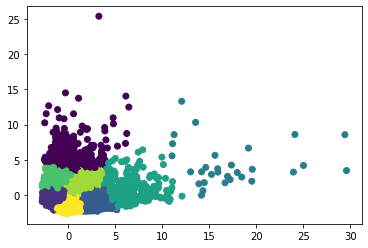

In [78]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c = KMeans(n_clusters=8, random_state=40).fit_predict(df_pca2), cmap =None) 
plt.show()

#### Plot the dendrogram

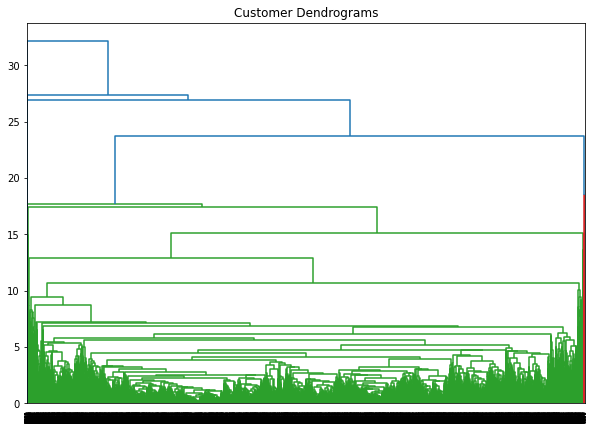

In [80]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled, method="average"))

### Clustering using K-Means

In [98]:
#Inertia Plot
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

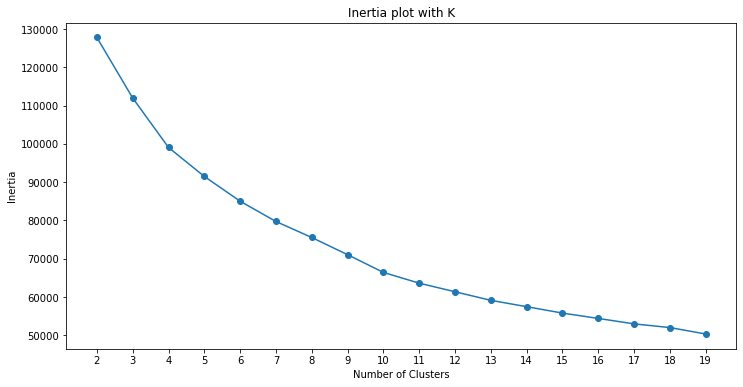

In [99]:
inertia_plot(KMeans, data_imputed)

Using the elbow method, we pick 8 as  a good number of clusters 

In [117]:
data_imputed = pd.DataFrame(data_scaled, columns=data.columns)

In [118]:
# select best columns
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final = pd.DataFrame(data_imputed[best_cols])
print('New dataframe with best columns has just been created. Data shape: ' + str(data_final.shape))


New dataframe with best columns has just been created. Data shape: (8950, 6)


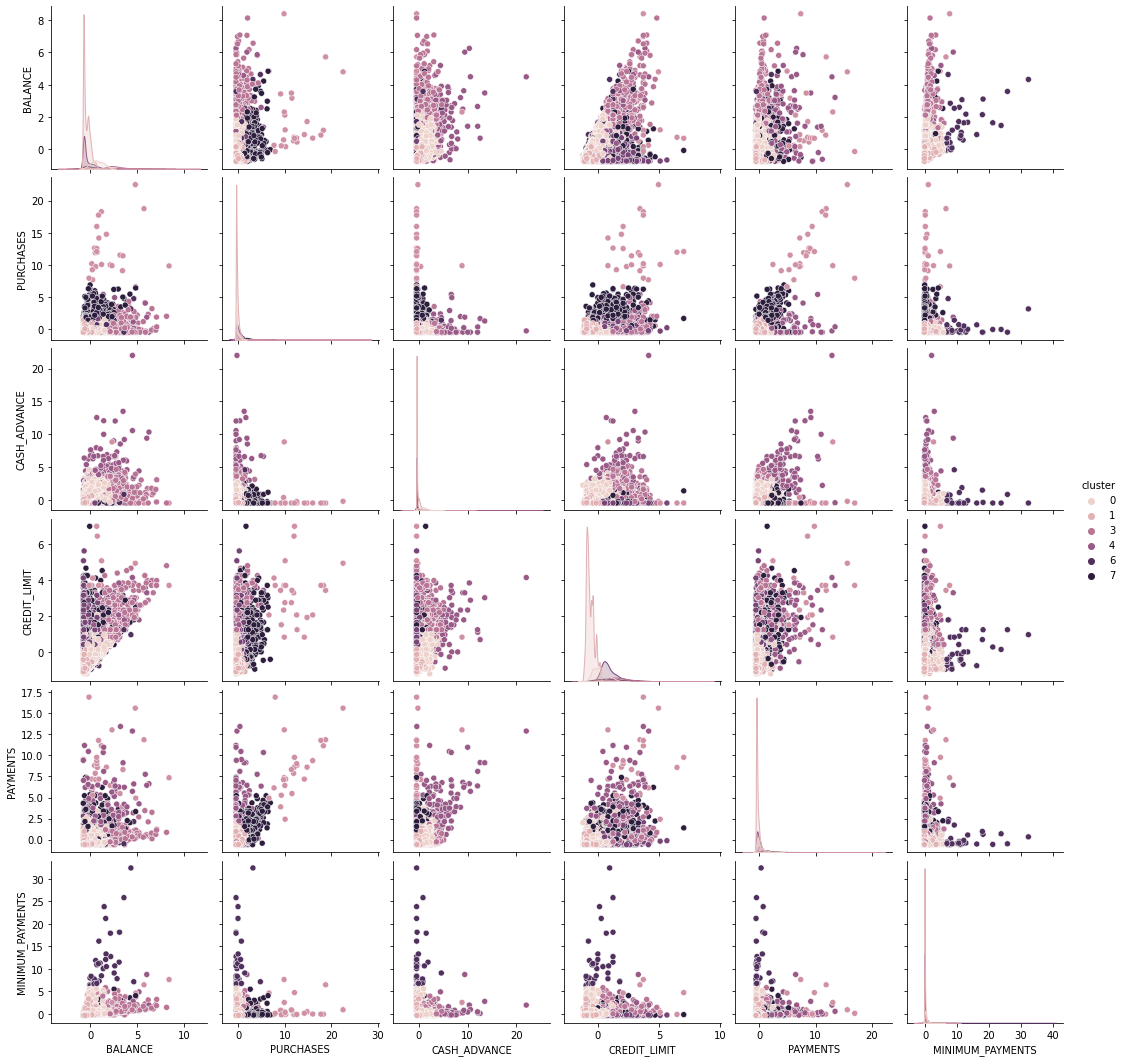

In [119]:
# apply KMeans clustering
alg = KMeans(n_clusters = 8)
label = alg.fit_predict(data_final)

# create a 'cluster' column
data_final['cluster'] = label
best_cols.append('cluster')

# make a Seaborn pairplot
sns.pairplot(data_final[best_cols], hue='cluster')

### Kmeans Model with 4 Clusters

In [124]:
kmeans4_  = KMeans(n_clusters=4, random_state=40).fit(data_imputed)
data_imputed['cluster'] = kmeans4_.labels_

<Figure size 1800x1800 with 0 Axes>

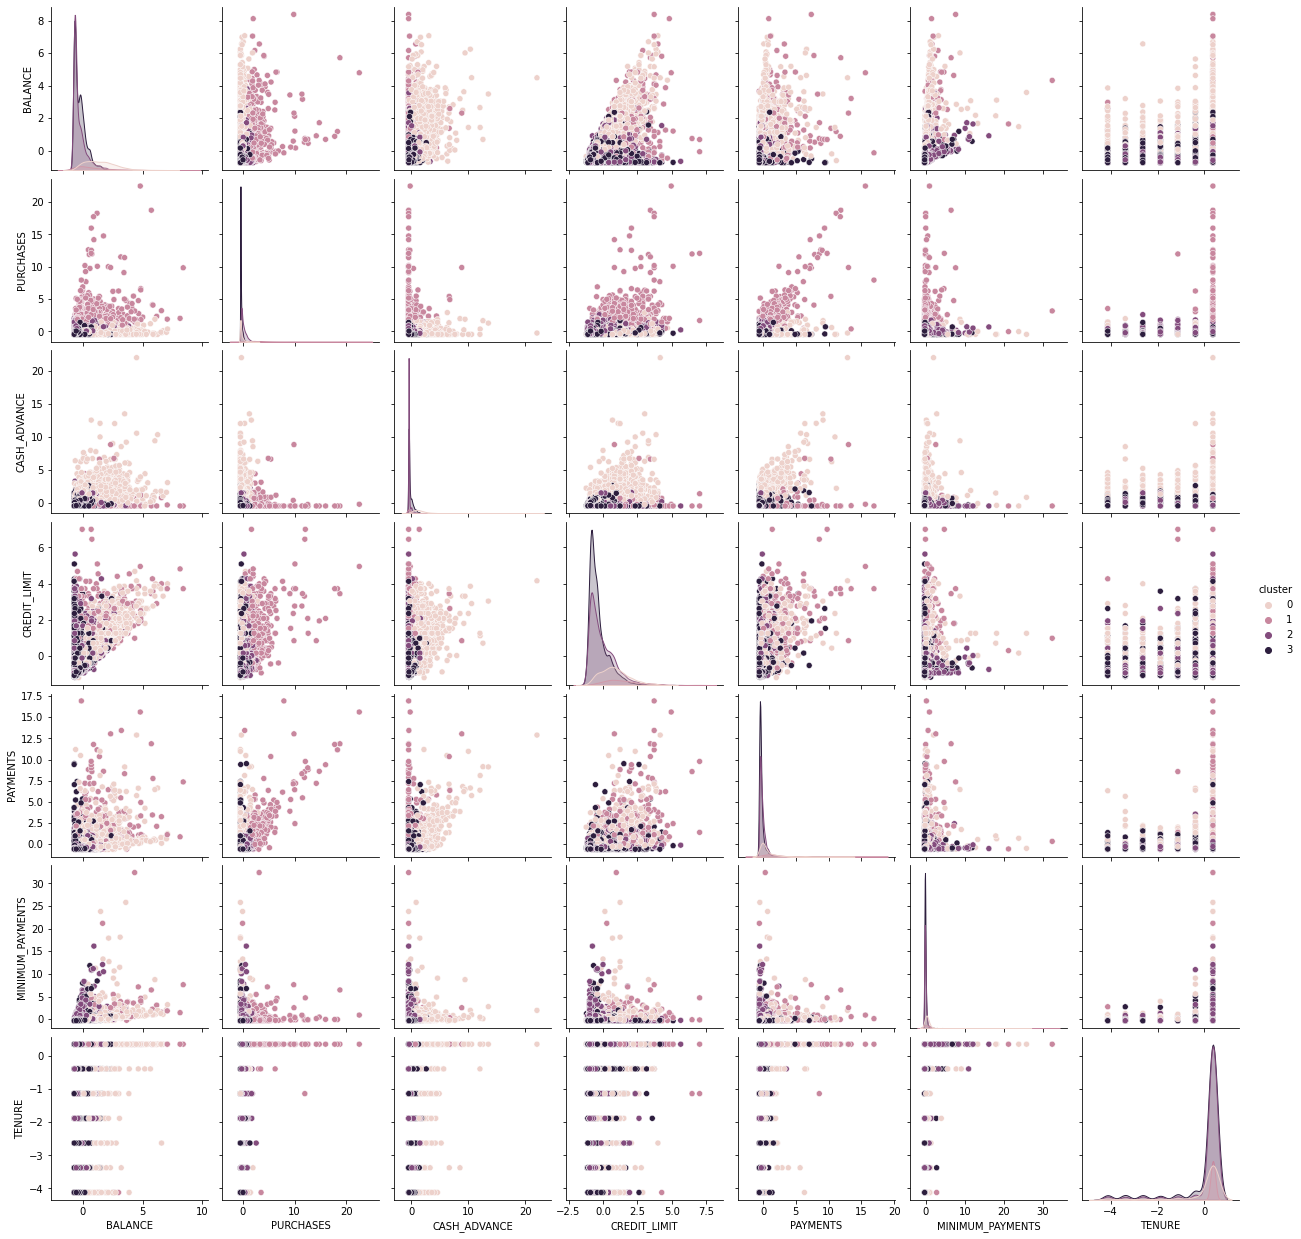

In [129]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( data_imputed[best_columns], hue="cluster")

Compering 2 different Kmeans Models showed that we have a better understanding of customer segmentation by using the 8 clusters model. 